# Horizonts modelling dataset

# Content

* [Cube 1](cube_1)
* [Cube 2](cube_2)
* [Cube 3](cube_3)
* [Cube 4](cube_4)

| Cube alias | Filename|  Size | Shape (ilines, xlines, height) | Size of labels |
| :------ | --- | ----: | ----: | ----: |
| CUBE_1 | E_anon.hdf5 | 21 GB | 2563, 1409, 1501 | 1.1 GB | 
| CUBE_2 | M_cube.hdf5 | 2.8 GB | 418, 869, 2001 | 0.07 GB |
| CUBE_3 | P_cube.hdf5 | 54 GB | 2737, 2599, 2001 | 0.68 GB |
| CUBE_4 | R_cube.hdf5 | 8.2 GB | 1472, 1380, 1071 | 0.81 GB |

Each cube is located at `/notebooks/SEISMIC_DATA/` + `cube alias` + `filename`

Labels for each cube are contained at `/notebooks/SEISMIC_DATA/` + `cube alias` + `HORIZONTS`

In [1]:
import sys
from tqdm import tqdm_notebook
from glob import glob
import matplotlib.pyplot as plt

sys.path.append('..')
from seismiqb.batchflow import L, D, Pipeline, FilesIndex
from seismiqb import SeismicCropBatch, SeismicGeometry, SeismicCubeset

<a id='cube_1'></a>
# Cube 1

First of all, we make an index with `.hdf5` cube. `SeismicCubeset` provides lots of processing actions for different types of seismic information (cubes in different formats, labels).

In [2]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_1/E_anon.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

ds = ds.load()
# ~60 seconds

CPU times: user 27.9 s, sys: 6.85 s, total: 34.7 s
Wall time: 36 s


Lets look at different parameters of the cube:

In [3]:
geometry = ds.geometries[ds.indices[0]]

geometry.log(print)

Info for cube: /notebooks/SEISMIC_DATA/CUBE_1/E_anon.hdf5
Depth of one trace is: 1501
Time delay: 50
Sample rate: 2
Number of ILINES: 2563
Number of XLINES: 1409
ILINES range from 24 to 2586
ILINES range from 19 to 1427
CDP_X range from 717115 to 752315
CDP_X range from 7150315 to 7214365


Some of the (iline, xline) points have at least one hand-labeled horizon, while some of them don't. We can look at the cube 'from above' to check size of labeled area:

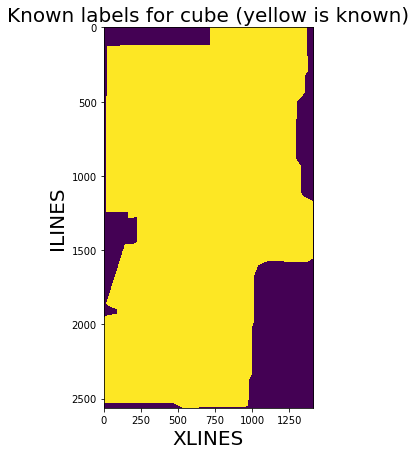

In [4]:
ds.show_labels()

Pipeline of image loading: 

In [5]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 1400, 1400])
                 .load_cubes(dst='images')
                 .create_masks(dst='masks', width=1)
                 .scale(mode='normalize', src='images')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

Images from E_anon


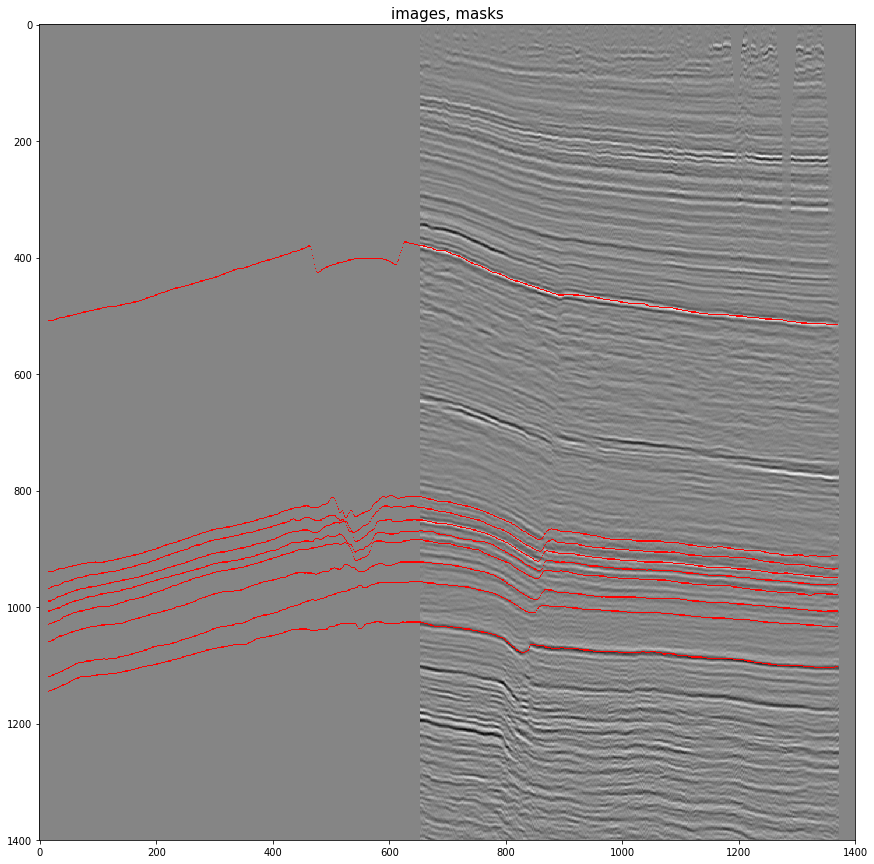

In [6]:
demo_batch.plot_components(13, 'images', 'masks', overlap=True, rotate_axes=1)

This cube is the best one in terms of quality of labels/amount of labels.

<a id='cube_1'></a>
# Cube 2

In [7]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_2/M_cube.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

ds = ds.load()
# ~4 seconds

CPU times: user 2.32 s, sys: 184 ms, total: 2.5 s
Wall time: 2.51 s


In [8]:
geometry = ds.geometries[ds.indices[0]]

geometry.log(print)

Info for cube: /notebooks/SEISMIC_DATA/CUBE_2/M_cube.hdf5
Depth of one trace is: 2001
Time delay: 0
Sample rate: 2
Number of ILINES: 418
Number of XLINES: 869
ILINES range from 1084 to 1501
ILINES range from 558 to 1426
CDP_X range from 254049 to 276636
CDP_X range from 6875517 to 6887900


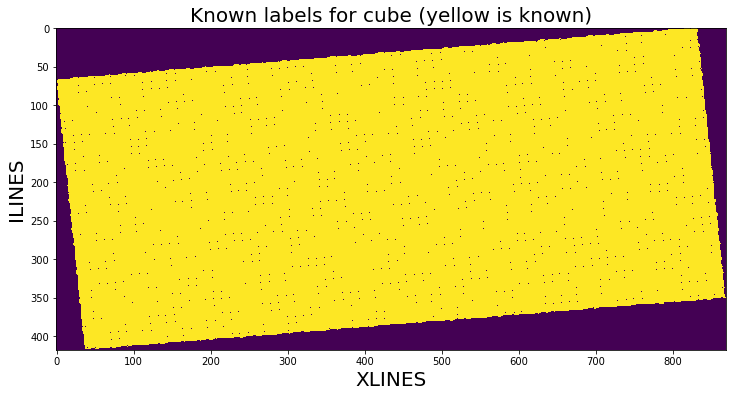

In [9]:
ds.show_labels()

In [10]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 850, 1500])
                 .load_cubes(dst='images')
                 .create_masks(dst='masks', width=1)
                 .scale(mode='normalize', src='images')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

Images from M_cube


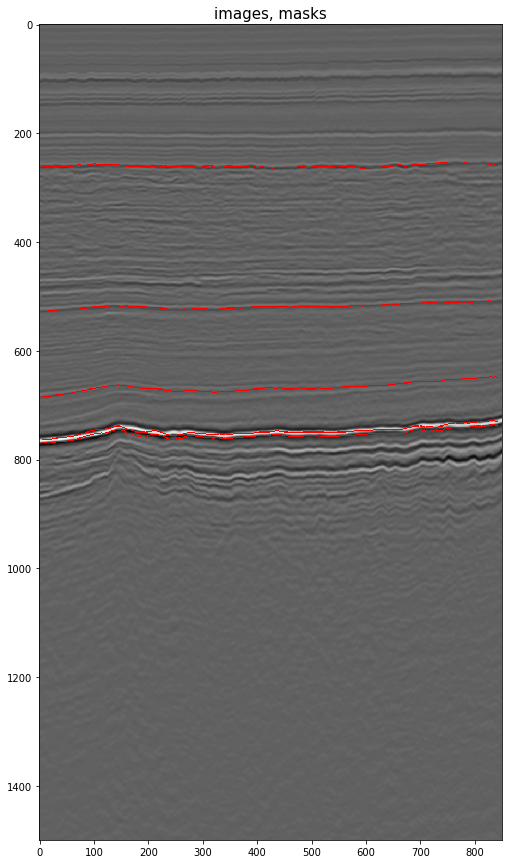

In [11]:
demo_batch.plot_components(13, 'images', 'masks', overlap=True, rotate_axes=1)

Something is off with the connection between cube coordinates and labels coordinates. Despite that, cube is very small and amount of labels is even smaller, so this cube is usually held out for visual testing.

<a id='cube_3'></a>
# Cube 3

In [12]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_3/P_cube.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

ds = ds.load()
# ~43 seconds

CPU times: user 19.1 s, sys: 4.73 s, total: 23.8 s
Wall time: 24.3 s


In [13]:
geometry = ds.geometries[ds.indices[0]]

geometry.log(print)

Info for cube: /notebooks/SEISMIC_DATA/CUBE_3/P_cube.hdf5
Depth of one trace is: 2001
Time delay: 0
Sample rate: 2
Number of ILINES: 2737
Number of XLINES: 2599
ILINES range from 1709 to 4445
ILINES range from 1227 to 3825
CDP_X range from 550973 to 615923
CDP_X range from 6754801 to 6823201


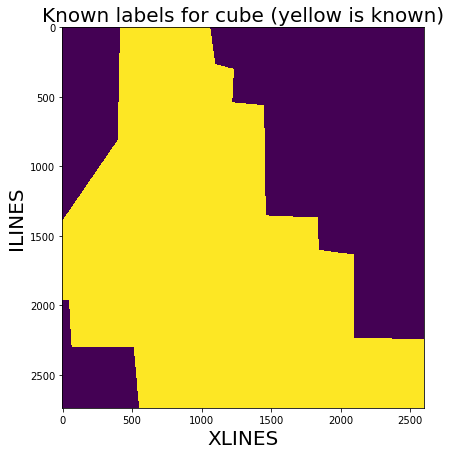

In [14]:
ds.show_labels()

In [15]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 2000, 2000])
                 .load_cubes(dst='images')
                 .create_masks(dst='masks', width=1)
                 .scale(mode='normalize', src='images')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

Images from P_cube


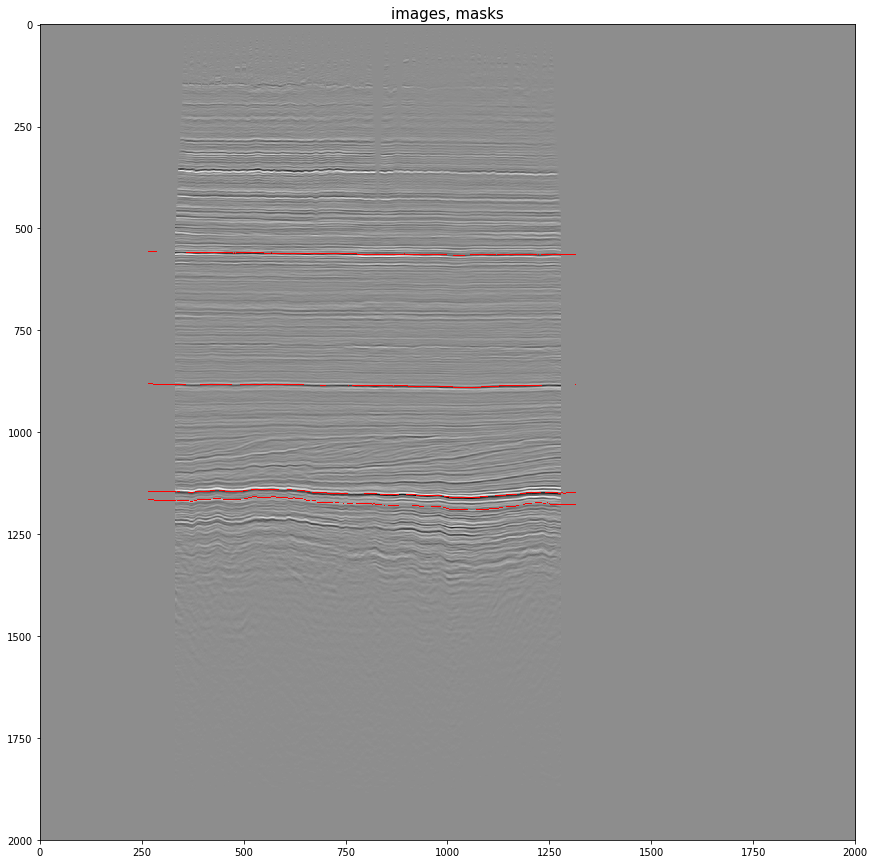

In [16]:
demo_batch.plot_components(13, 'images', 'masks', overlap=True, rotate_axes=1)

Almost all of the horizons are very plain, and data from this cube does not generalize very well to the others.

<a id='cube_vu'></a>
# Cube 4

In [2]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_4/R_cube.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

ds = ds.load()
# ~35 seconds

CPU times: user 15.1 s, sys: 3.99 s, total: 19.1 s
Wall time: 19.6 s


In [3]:
geometry = ds.geometries[ds.indices[0]]

geometry.log(print)

Info for cube: /notebooks/SEISMIC_DATA/CUBE_4/R_cube.hdf5
Depth of one trace is: 1071
Time delay: -280
Sample rate: 4
Number of ILINES: 1472
Number of XLINES: 1380
ILINES range from 1001 to 2472
ILINES range from 5001 to 6380


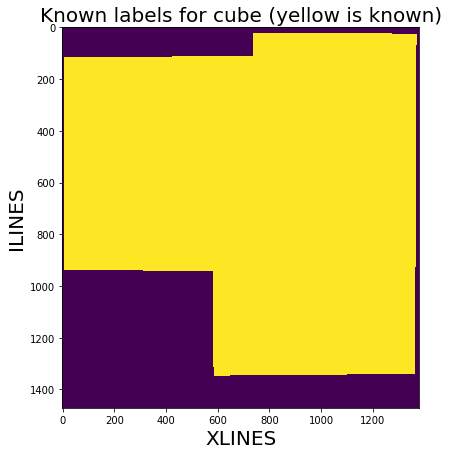

In [19]:
ds.show_labels()

In [20]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 1000, 1000])
                 .load_cubes(dst='images')
                 .create_masks(dst='masks', width=1)
                 .scale(mode='normalize', src='images')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

Images from Repaired_cube


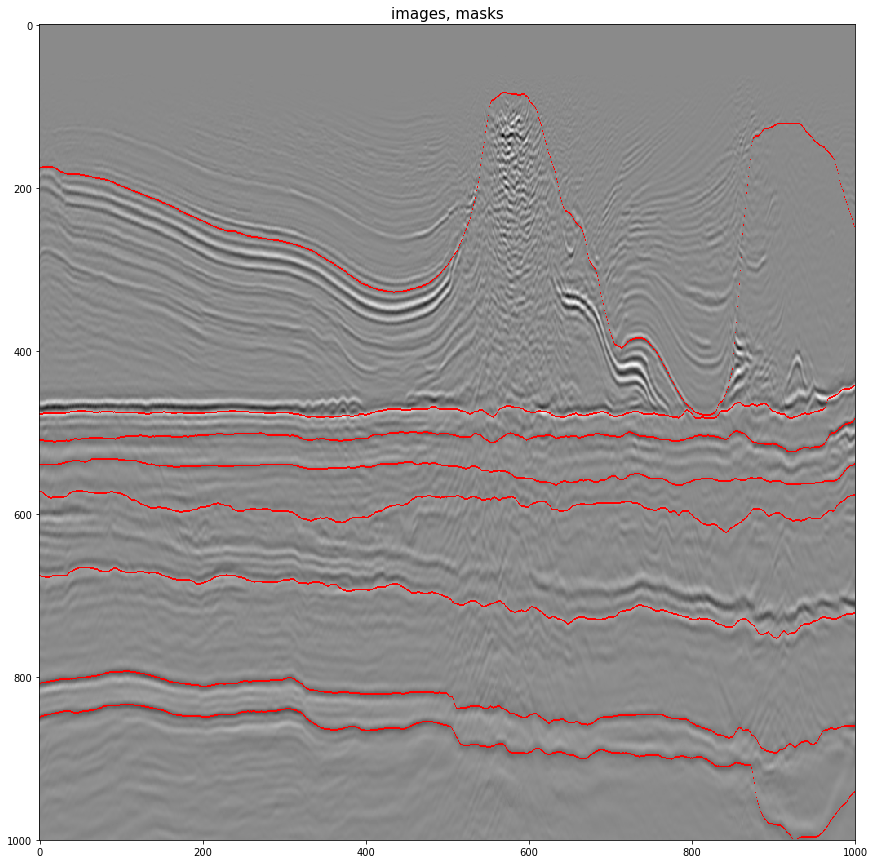

In [21]:
demo_batch.plot_components(13, 'images', 'masks', overlap=True, rotate_axes=1)

Labels for this cube contain not only most visible horizons (like for others), but also outlines for different structures (e.g. salt). This cube has a good ratio between cube and labels sizes, but quality of labelling is lacking, as evident on the picture above.